<a href="https://colab.research.google.com/github/KeeJin/SCL/blob/master/SCL_product_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tf-nightly

     |████████████████████████████████| 322.8MB 51kB/s 
     |████████████████████████████████| 3.0MB 42.0MB/s 
     |████████████████████████████████| 460kB 42.1MB/s 


In [ ]:
pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
cd ../gdrive/My\ Drive/SCL_product_detection/shopee-product-detection-dataset

/gdrive/My Drive/SCL_product_detection/shopee-product-detection-dataset


In [ ]:
ls

checkpoints_kee/        train.csv
checkpoints_overdrive/  training_stats_effnetB6.csv
submission.csv          training_stats_overdrive_effnetB6.csv
test/                   train_set.csv
test.csv                val_set.csv
train/


In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
train_df.head()

,filename,category
0,45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg,3
1,f74d1a5fc2498bbbfa045c74e3cc333e.jpg,3
2,f6c172096818c5fab10ecae722840798.jpg,3
3,251ffd610399ac00fea7709c642676ee.jpg,3
4,73c7328b8eda399199fdedec6e4badaf.jpg,3


In [ ]:
train_df.groupby(by = 'category').agg('count')
# train_df['category'].value_counts()

,filename
category,
0,2683
1,2702
2,2687
3,2703
4,2703
5,2641
6,2641
7,2660
8,2700


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


filename    object
category     int64
dtype: object

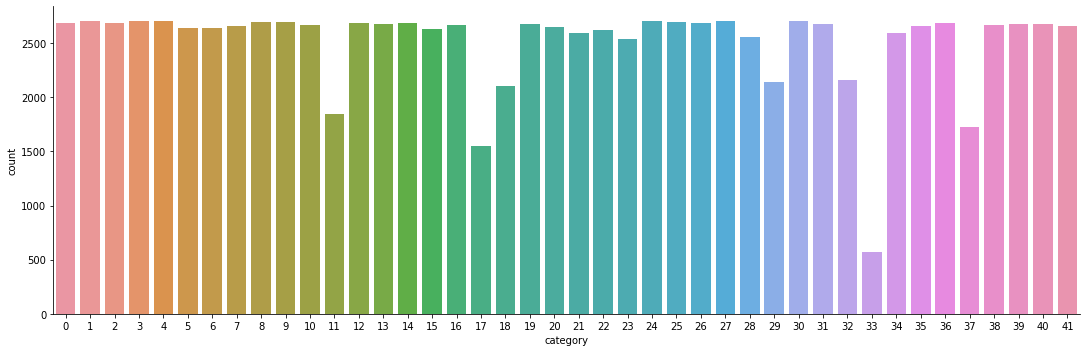

In [ ]:
import seaborn as sb

sb.catplot(x = 'category', data = train_df, kind = 'count', aspect = 3)
train_df.dtypes

# Create dataset of image file directories


In [ ]:
import glob
import os
import pandas as pd

CLASS_DIR = 'train'
TEST_DIR = 'test'

data_lst = []
for root, dirs, files in os.walk(CLASS_DIR, topdown=True):
  counter = 0
  for name in files:
    if '.jpg' not in name:
      continue
    if counter < 1500:
      filename = os.path.abspath(os.path.join(root, name))
      class_name = os.path.basename(root)
      data_lst.append((filename, class_name))
      counter += 1
    else:
      break


In [ ]:
print(len(data_lst))
data_lst[-1]

50309


('/gdrive/My Drive/shopee-product-detection-dataset/train/38/b6604ca724aa9f56b5e08bb13dd736c8.jpg',
 '38')

In [ ]:
df_lookup = pd.DataFrame(data_lst, columns=['filename', 'class_name'])

df_lookup['class_name'] = df_lookup['class_name'].astype('category')
df_lookup['class'] = df_lookup['class_name'].cat.codes
# df_lookup[df_lookup['class_name']=='41']
df_lookup.tail()

,filename,class_name,class
50304,/gdrive/My Drive/shopee-product-detection-data...,30,30
50305,/gdrive/My Drive/shopee-product-detection-data...,30,30
50306,/gdrive/My Drive/shopee-product-detection-data...,30,30
50307,/gdrive/My Drive/shopee-product-detection-data...,30,30
50308,/gdrive/My Drive/shopee-product-detection-data...,38,35


In [ ]:
#shuffle
df_lookup = df_lookup.sample(frac=1).reset_index(drop=True)


print(len(df_lookup))
df_lookup.dtypes
df_lookup.head(20)

50309


,filename,class_name,class
0,/gdrive/My Drive/shopee-product-detection-data...,27,27
1,/gdrive/My Drive/shopee-product-detection-data...,20,20
2,/gdrive/My Drive/shopee-product-detection-data...,19,19
3,/gdrive/My Drive/shopee-product-detection-data...,23,23
4,/gdrive/My Drive/shopee-product-detection-data...,10,10
5,/gdrive/My Drive/shopee-product-detection-data...,10,10
6,/gdrive/My Drive/shopee-product-detection-data...,07,7
7,/gdrive/My Drive/shopee-product-detection-data...,13,13
8,/gdrive/My Drive/shopee-product-detection-data...,19,19
9,/gdrive/My Drive/shopee-product-detection-data...,18,18


In [ ]:
# Split into train and validation sets
train_set_percentage = .9


train_set = df_lookup[:int(len(df_lookup)*train_set_percentage)]
val_set = df_lookup[int(len(df_lookup)*train_set_percentage):]

# shuffle 
train_set = train_set.sample(frac=1).reset_index(drop=True)
val_set = val_set.sample(frac=1).reset_index(drop=True)

print(train_set.shape)
print(val_set.shape)

(45278, 3)
(5031, 3)


In [ ]:
# Split train set into 4 shards

import numpy as np
count = 1
n = 14000
for g, df in train_set.groupby(np.arange(len(train_set)) // n):
  if count == 1:
    train_set_1 = df
  elif count == 2:
    train_set_2 = df
  elif count == 3:
    train_set_3 = df
  else:
    train_set_4 = df
  count += 1

In [ ]:
train_set_4.shape

(13865, 3)

In [ ]:
# Save the train and validation set so that I do not have to resplit and reshuffle everytime colab crashes

train_set.to_csv('train_set.csv', index = False)
val_set.to_csv('val_set.csv', index = False)

In [ ]:
# Loads the train and validation set

train_set = pd.read_csv("train_set.csv")
val_set = pd.read_csv("val_set.csv")

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB6, preprocess_input

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten, Input
from tensorflow.keras.models import Model,load_model,Sequential
import tensorflow as tf

import pandas as pd

# Image pipeline

In [ ]:
# Reads an image from a file, decodes it into a tensor, and resizes it
# to a fixed shape.
img_rows, img_cols = 528,528
num_classes = 42
batch_size = 32

def _parse_function(filename, label):
  image_string = tf.io.read_file(filename)
  image_decoded = tf.image.decode_jpeg(image_string,channels=3)
  image_resized = tf.image.resize(image_decoded, [img_rows, img_cols])
  image_resized = tf.ensure_shape(image_resized ,shape=(img_rows, img_cols,3))
  label = tf.one_hot(label, num_classes)
  return image_resized, label

In [ ]:

@tf.function
def image_augmentation(filename, label):
  image_string = tf.io.read_file(filename)
  image_decoded = tf.image.decode_jpeg(image_string,channels=3)

  # resizing
  if tf.random.uniform(()) > 0.5:
      image_resized = tf.image.resize_with_crop_or_pad(image_decoded, img_rows, img_cols)
  else:
      image_resized = tf.image.random_crop(image_decoded, size=[ img_rows, img_cols, 3])

  # image = tf.image.resize_with_crop_or_pad( image, img_rows, img_cols)
  image_resized = tf.ensure_shape(image_resized ,shape=(img_rows, img_cols,3))

  # Image augmentation 
  image = tf.image.random_flip_left_right(image_resized,seed = 33)
  image = tf.image.random_flip_up_down( image, seed = 23)

  # Contrast and Brightness
  if tf.random.uniform(()) > 0.4:
      image = tf.image.random_contrast(image, 0.1,0.9,seed = None)
  if tf.random.uniform(()) > 0.4:
      image = tf.image.random_brightness( image, max_delta= 0.05, seed = None)
      image = tf.image.random_hue( image, max_delta= 0.05, seed = None)


  print(image.shape)
  label = tf.one_hot(label, num_classes)
  return image, label

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((tf.cast(train_set_1['filename'].values, tf.string),
                                                    tf.cast(train_set_1['class'].values, tf.int32) ))
train_dataset = train_dataset.map(image_augmentation)
train_dataset = train_dataset.apply(tf.data.experimental.ignore_errors())
train_dataset = train_dataset.shuffle(1500)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(batch_size, drop_remainder=True)

In [ ]:
train_dataset

<BatchDataset shapes: ((32, 528, 528, 3), (32, 42)), types: (tf.uint8, tf.float32)>

In [ ]:
valid_dataset = tf.data.Dataset.from_tensor_slices((tf.cast(val_set['filename'].values, tf.string),
                                                    tf.cast(val_set['class'].values, tf.int32) ))
valid_dataset = valid_dataset.map(_parse_function)
valid_dataset = valid_dataset.apply(tf.data.experimental.ignore_errors())
valid_dataset = valid_dataset.repeat()
valid_dataset = valid_dataset.batch(batch_size, drop_remainder=True)

In [ ]:
valid_dataset

<BatchDataset shapes: ((32, 528, 528, 3), (32, 42)), types: (tf.float32, tf.float32)>

# Download EfficientNetB6 model (pretrained, remove top layers, define input shape)

In [ ]:
base_model   = EfficientNetB6(weights='imagenet', include_top=False, pooling=None, input_shape = (528, 528, 3))
print("Model loaded.")

base_model.summary()

165240832/165234480 [==============================] - 4s 0us/step
Model loaded.
Model: "efficientnetb6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 528, 528, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 528, 528, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 528, 528, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 529, 529, 3)  0           normalization[0][0]              
____

# Add my own hidden layers

In [ ]:
# add a global spatial average pooling layer
x = base_model.output

x = GlobalAveragePooling2D()(x)

# let's add a fully-connected layer
x = Dense(450, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(380, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(380, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(num_classes, activation='softmax')(x)


In [ ]:
# this is the final model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 528, 528, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 528, 528, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 528, 528, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 529, 529, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [ ]:
# # Replace all Batch Normalization layers by Group Normalization layers
# for i, layer in enumerate(base_model.layers):
#     if "batch_normalization" in layer.name:
#         base_model.layers[i] = GroupNormalization(groups=32, axis=-1, epsilon=0.00001)

# Freeze bottom layers, only train top layers

In [ ]:
for layer in base_model.layers:
    print(layer.name)
    layer.trainable = False


input_1
rescaling
normalization
stem_conv_pad
stem_conv
stem_bn
stem_activation
block1a_dwconv
block1a_bn
block1a_activation
block1a_se_squeeze
block1a_se_reshape
block1a_se_reduce
block1a_se_expand
block1a_se_excite
block1a_project_conv
block1a_project_bn
block1b_dwconv
block1b_bn
block1b_activation
block1b_se_squeeze
block1b_se_reshape
block1b_se_reduce
block1b_se_expand
block1b_se_excite
block1b_project_conv
block1b_project_bn
block1b_drop
block1b_add
block1c_dwconv
block1c_bn
block1c_activation
block1c_se_squeeze
block1c_se_reshape
block1c_se_reduce
block1c_se_expand
block1c_se_excite
block1c_project_conv
block1c_project_bn
block1c_drop
block1c_add
block2a_expand_conv
block2a_expand_bn
block2a_expand_activation
block2a_dwconv_pad
block2a_dwconv
block2a_bn
block2a_activation
block2a_se_squeeze
block2a_se_reshape
block2a_se_reduce
block2a_se_expand
block2a_se_excite
block2a_project_conv
block2a_project_bn
block2b_expand_conv
block2b_expand_bn
block2b_expand_activation
block2b_dwconv


In [ ]:
for layer in model.layers:
    print(layer.name,' Trainable =',layer.trainable)

input_1  Trainable = False
rescaling  Trainable = False
normalization  Trainable = False
stem_conv_pad  Trainable = False
stem_conv  Trainable = False
stem_bn  Trainable = False
stem_activation  Trainable = False
block1a_dwconv  Trainable = False
block1a_bn  Trainable = False
block1a_activation  Trainable = False
block1a_se_squeeze  Trainable = False
block1a_se_reshape  Trainable = False
block1a_se_reduce  Trainable = False
block1a_se_expand  Trainable = False
block1a_se_excite  Trainable = False
block1a_project_conv  Trainable = False
block1a_project_bn  Trainable = False
block1b_dwconv  Trainable = False
block1b_bn  Trainable = False
block1b_activation  Trainable = False
block1b_se_squeeze  Trainable = False
block1b_se_reshape  Trainable = False
block1b_se_reduce  Trainable = False
block1b_se_expand  Trainable = False
block1b_se_excite  Trainable = False
block1b_project_conv  Trainable = False
block1b_project_bn  Trainable = False
block1b_drop  Trainable = False
block1b_add  Trainabl

# Model Training


In [ ]:
model.load_weights("./checkpoints_kee/prod_detection_best_weights_ftftft.hdf5")

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.001)

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
len(train_set_1)

14000

In [ ]:
len(val_set)

6208

In [ ]:
train_steps = int(14000/batch_size) #total trains set / batch_size
val_steps = int(6208/batch_size)
epochs = 20


print('train steps:',train_steps)
print('val steps:',val_steps)

train steps: 437
val steps: 194


In [ ]:
reduce_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor = 0.9, patience=2, cooldown=1, min_lr = 0.00001)

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.

        # filepath="./checkpoints_kee/prod_detection_best_weights.hdf5",
        # filepath="./checkpoints_kee/prod_detection_best_weights_add.hdf5",      ## This is now shard 2
        # filepath="./checkpoints_kee/prod_detection_best_weights_shard3_add.hdf5",
        # filepath="./checkpoints_kee/prod_detection_best_weights_shard4.hdf5",
        filepath="./checkpoints_kee/prod_detection_best_weights_ftftft.hdf5",
        # filepath="./checkpoints_kee/prod_detection_best_weights_ft3_1.hdf5",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    ),
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=2e-3,
        # "no longer improving" being further defined as "for at least 5 epochs"
        patience=8,
        verbose=1
        ),
        reduce_LR
]



In [ ]:
### Train the model with validation 
## Lower Epochs, 5 by 5 until no improvement
## then switch to next shard
history = model.fit( train_dataset, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 1/20
437/437 [==============================] - ETA: 0s - loss: 2.1146 - accuracy: 0.4307 
Epoch 00001: val_loss improved from inf to 1.18030, saving model to ./checkpoints_kee/prod_detection_best_weights.hdf5
437/437 [==============================] - 9463s 22s/step - loss: 2.1146 - accuracy: 0.4307 - val_loss: 1.1803 - val_accuracy: 0.6698
Epoch 2/20
437/437 [==============================] - ETA: 0s - loss: 1.5953 - accuracy: 0.5669
Epoch 00002: val_loss improved from 1.18030 to 1.10807, saving model to ./checkpoints_kee/prod_detection_best_weights.hdf5
437/437 [==============================] - 2281s 5s/step - loss: 1.5953 - accuracy: 0.5669 - val_loss: 1.1081 - val_accuracy: 0.6947
Epoch 3/20
437/437 [==============================] - ETA: 0s - loss: 1.4812 - accuracy: 0.5958
Epoch 00003: val_loss improved from 1.10807 to 1.08271, saving model to ./checkpoints_kee/prod_detection_best_weights.hdf5
437/437 [==============================] - 2287s 5s/step - loss: 1.4812 - accur

In [ ]:
epochs = 10
history = model.fit( train_dataset, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                    initial_epoch =  history.epoch[-1],
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 5/10
437/437 [==============================] - ETA: 0s - loss: 1.0905 - accuracy: 0.6954
Epoch 00005: val_loss did not improve from 1.01837
437/437 [==============================] - 765s 2s/step - loss: 1.0905 - accuracy: 0.6954 - val_loss: 1.0656 - val_accuracy: 0.7258
Epoch 6/10
437/437 [==============================] - ETA: 0s - loss: 1.0742 - accuracy: 0.7059
Epoch 00006: val_loss did not improve from 1.01837
437/437 [==============================] - 765s 2s/step - loss: 1.0742 - accuracy: 0.7059 - val_loss: 1.0306 - val_accuracy: 0.7378
Epoch 7/10
437/437 [==============================] - ETA: 0s - loss: 1.0549 - accuracy: 0.7023
Epoch 00007: val_loss did not improve from 1.01837
437/437 [==============================] - 765s 2s/step - loss: 1.0549 - accuracy: 0.7023 - val_loss: 1.0421 - val_accuracy: 0.7376
Epoch 8/10
 28/437 [>.............................] - ETA: 8:16 - loss: 1.0388 - accuracy: 0.7344

KeyboardInterrupt: ignored

In [ ]:
history.history

{'accuracy': [0.5096153616905212,
  0.6403846144676208,
  0.6676282286643982,
  0.6817307472229004,
  0.7004006505012512,
  0.7120192050933838,
  0.7123397588729858,
  0.7165064215660095,
  0.7287660241127014,
  0.731330156326294],
 'loss': [1.7556477785110474,
  1.2887471914291382,
  1.179994821548462,
  1.1343774795532227,
  1.065245270729065,
  1.0150290727615356,
  1.0158103704452515,
  0.9908450245857239,
  0.9387459754943848,
  0.9331074357032776],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'val_accuracy': [0.7322850227355957,
  0.7492038011550903,
  0.7611464858055115,
  0.7577627301216125,
  0.7557722926139832,
  0.7647293210029602,
  0.7609474658966064,
  0.7744824886322021,
  0.7772691249847412,
  0.7681130766868591],
 'val_loss': [0.95805424451828,
  0.8857260346412659,
  0.8621318936347961,
  0.8582224249839783,
  0.8744741082191467,
  0.8397162556648254,
  0.8582708239555359,
  0.8318159580230713,
  0.8283583521842957,
  0.8361802101135

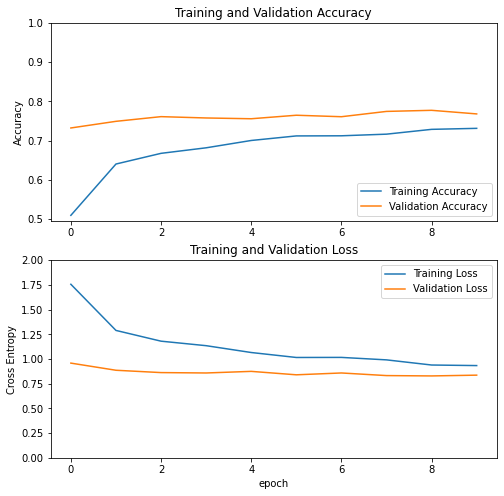

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# SHARD 2

train_dataset_2 = tf.data.Dataset.from_tensor_slices((tf.cast(train_set_2['filename'].values, tf.string),
                                                    tf.cast(train_set_2['class'].values, tf.int32) ))
train_dataset_2 = train_dataset_2.map(image_augmentation)
train_dataset_2 = train_dataset_2.apply(tf.data.experimental.ignore_errors())
train_dataset_2 = train_dataset_2.shuffle(1500)
train_dataset_2 = train_dataset_2.repeat()
train_dataset_2 = train_dataset_2.batch(batch_size, drop_remainder=True)

In [ ]:
print(len(train_set_2))
print(len(val_set))

14000
6208


In [ ]:
train_steps = int(14000/batch_size) #total trains set / batch_size
val_steps = int(6208/batch_size)
epochs = 20


print('train steps:',train_steps)
print('val steps:',val_steps)

train steps: 437
val steps: 194


In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.0004)

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
### Train the model with validation 
history2 = model.fit( train_dataset_2, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 1/20
437/437 [==============================] - ETA: 0s - loss: 1.4555 - accuracy: 0.6278
Epoch 00001: val_loss improved from 1.01837 to 0.97017, saving model to ./checkpoints_kee/prod_detection_best_weights_add.hdf5
437/437 [==============================] - 2751s 6s/step - loss: 1.4555 - accuracy: 0.6278 - val_loss: 0.9702 - val_accuracy: 0.7448
Epoch 2/20
437/437 [==============================] - ETA: 0s - loss: 1.3515 - accuracy: 0.6419
Epoch 00002: val_loss improved from 0.97017 to 0.95944, saving model to ./checkpoints_kee/prod_detection_best_weights_add.hdf5
437/437 [==============================] - 772s 2s/step - loss: 1.3515 - accuracy: 0.6419 - val_loss: 0.9594 - val_accuracy: 0.7482
Epoch 3/20
437/437 [==============================] - ETA: 0s - loss: 1.3130 - accuracy: 0.6568
Epoch 00003: val_loss improved from 0.95944 to 0.95482, saving model to ./checkpoints_kee/prod_detection_best_weights_add.hdf5
437/437 [==============================] - 770s 2s/step - loss: 1.

In [ ]:
### Train the model with validation 
history2_1 = model.fit( train_dataset_2, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   initial_epoch =  history2.epoch[-1],
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

In [ ]:
history2.history

{'accuracy': [0.6277889013290405,
  0.6418764591217041,
  0.6567505598068237,
  0.6561784744262695,
  0.6699084639549255,
  0.6714816689491272,
  0.6789902448654175,
  0.6760583519935608,
  0.6875715255737305,
  0.6936498880386353,
  0.6975114345550537,
  0.7003718614578247,
  0.7023026347160339,
  0.7046624422073364,
  0.7087385654449463,
  0.7115989923477173,
  0.7169622182846069,
  0.7213243842124939,
  0.7217534184455872],
 'loss': [1.455518364906311,
  1.3514634370803833,
  1.3130475282669067,
  1.284501314163208,
  1.2385971546173096,
  1.2000315189361572,
  1.182214379310608,
  1.1798837184906006,
  1.1390799283981323,
  1.1243431568145752,
  1.0975425243377686,
  1.0832892656326294,
  1.061621069908142,
  1.0468584299087524,
  1.0378705263137817,
  1.0270370244979858,
  1.0037871599197388,
  0.9943848252296448,
  0.9843412637710571],
 'lr': [0.0004,
  0.0004,
  0.0004,
  0.0004,
  0.0004,
  0.0004,
  0.0004,
  0.0004,
  0.0004,
  0.00036,
  0.00036,
  0.00036,
  0.00036,
  0.00

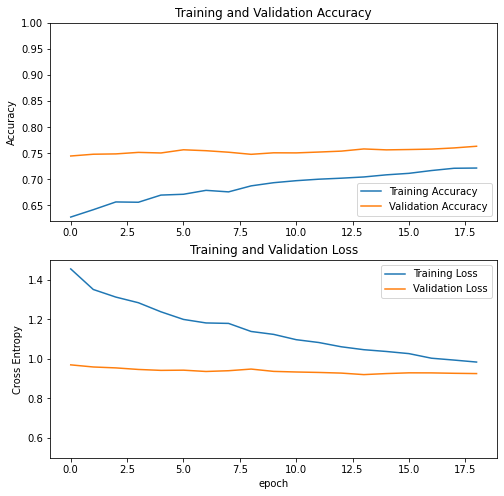

In [ ]:
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0.5,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# SHARD 3

train_dataset_3 = tf.data.Dataset.from_tensor_slices((tf.cast(train_set_3['filename'].values, tf.string),
                                                    tf.cast(train_set_3['class'].values, tf.int32) ))
train_dataset_3 = train_dataset_3.map(image_augmentation)
train_dataset_3 = train_dataset_3.apply(tf.data.experimental.ignore_errors())
train_dataset_3 = train_dataset_3.shuffle(1500)
train_dataset_3 = train_dataset_3.repeat()
train_dataset_3 = train_dataset_3.batch(batch_size, drop_remainder=True)

(528, 528, 3)


In [ ]:
print(len(train_set_3))
print(len(val_set))

14000
6208


In [ ]:
train_steps = int(14000/batch_size) #total trains set / batch_size
val_steps = int(6208/batch_size)
epochs = 20


print('train steps:',train_steps)
print('val steps:',val_steps)

train steps: 437
val steps: 194


In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.0003)

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
### Train the model with validation 
history3 = model.fit( train_dataset_3, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 1/20
437/437 [==============================] - ETA: 0s - loss: 1.3691 - accuracy: 0.6522 
Epoch 00001: val_loss improved from inf to 0.92139, saving model to ./checkpoints_kee/prod_detection_best_weights_shard3.hdf5
437/437 [==============================] - 9202s 21s/step - loss: 1.3691 - accuracy: 0.6522 - val_loss: 0.9214 - val_accuracy: 0.7563
Epoch 2/20
437/437 [==============================] - ETA: 0s - loss: 1.3116 - accuracy: 0.6566
Epoch 00002: val_loss improved from 0.92139 to 0.91163, saving model to ./checkpoints_kee/prod_detection_best_weights_shard3.hdf5
437/437 [==============================] - 2274s 5s/step - loss: 1.3116 - accuracy: 0.6566 - val_loss: 0.9116 - val_accuracy: 0.7576
Epoch 3/20
437/437 [==============================] - ETA: 0s - loss: 1.2609 - accuracy: 0.6618
Epoch 00003: val_loss improved from 0.91163 to 0.91005, saving model to ./checkpoints_kee/prod_detection_best_weights_shard3.hdf5
437/437 [==============================] - 2269s 5s/step -

In [ ]:
epochs = 25

### Train the model with validation 
history3_1 = model.fit( train_dataset_3, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   initial_epoch =  12,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 13/25
437/437 [==============================] - ETA: 0s - loss: 1.0736 - accuracy: 0.6994 
Epoch 00013: val_loss improved from inf to 0.89192, saving model to ./checkpoints_kee/prod_detection_best_weights_shard3_add.hdf5
437/437 [==============================] - 8729s 20s/step - loss: 1.0736 - accuracy: 0.6994 - val_loss: 0.8919 - val_accuracy: 0.7637
Epoch 14/25
437/437 [==============================] - ETA: 0s - loss: 1.0598 - accuracy: 0.7012
Epoch 00014: val_loss did not improve from 0.89192
437/437 [==============================] - 2329s 5s/step - loss: 1.0598 - accuracy: 0.7012 - val_loss: 0.8931 - val_accuracy: 0.7663
Epoch 15/25
437/437 [==============================] - ETA: 0s - loss: 1.0462 - accuracy: 0.7102
Epoch 00015: val_loss did not improve from 0.89192
437/437 [==============================] - 2326s 5s/step - loss: 1.0462 - accuracy: 0.7102 - val_loss: 0.8981 - val_accuracy: 0.7642
Epoch 16/25
437/437 [==============================] - ETA: 0s - loss: 1.040

In [ ]:
# SHARD 4

train_dataset_4 = tf.data.Dataset.from_tensor_slices((tf.cast(train_set_4['filename'].values, tf.string),
                                                    tf.cast(train_set_4['class'].values, tf.int32) ))
train_dataset_4 = train_dataset_4.map(image_augmentation)
train_dataset_4 = train_dataset_4.apply(tf.data.experimental.ignore_errors())
train_dataset_4 = train_dataset_4.shuffle(1500)
train_dataset_4 = train_dataset_4.repeat()
train_dataset_4 = train_dataset_4.batch(batch_size, drop_remainder=True)

In [ ]:
print(len(train_set_4))
print(len(val_set))

13865
6208


In [ ]:
train_steps = int(13865/batch_size) #total trains set / batch_size
val_steps = int(6208/batch_size)
epochs = 20


print('train steps:',train_steps)
print('val steps:',val_steps)

train steps: 433
val steps: 194


In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.0003)

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
### Train the model with validation 
history4 = model.fit( train_dataset_4, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 1/20
433/433 [==============================] - ETA: 0s - loss: 1.3042 - accuracy: 0.6693 WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.8562s vs `on_test_batch_end` time: 2.6345s). Check your callbacks.

Epoch 00001: val_loss improved from inf to 0.88628, saving model to ./checkpoints_kee/prod_detection_best_weights_shard4.hdf5
433/433 [==============================] - 7089s 16s/step - loss: 1.3042 - accuracy: 0.6693 - val_loss: 0.8863 - val_accuracy: 0.7663
Epoch 2/20
433/433 [==============================] - ETA: 0s - loss: 1.2332 - accuracy: 0.6757
Epoch 00002: val_loss did not improve from 0.88628
433/433 [==============================] - 2292s 5s/step - loss: 1.2332 - accuracy: 0.6757 - val_loss: 0.8874 - val_accuracy: 0.7685
Epoch 3/20
164/433 [==========>...................] - ETA: 16:37 - loss: 1.2356 - accuracy: 0.6812

In [ ]:
### Train the model with validation 
history4 = model.fit( train_dataset_4, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   initial_epoch=1,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 2/20
433/433 [==============================] - ETA: 0s - loss: 1.2446 - accuracy: 0.6748 
Epoch 00002: val_loss improved from inf to 0.88970, saving model to ./checkpoints_kee/prod_detection_best_weights_shard4.hdf5
433/433 [==============================] - 13912s 32s/step - loss: 1.2446 - accuracy: 0.6748 - val_loss: 0.8897 - val_accuracy: 0.7677
Epoch 3/20
433/433 [==============================] - ETA: 0s - loss: 1.2193 - accuracy: 0.6801
Epoch 00003: val_loss improved from 0.88970 to 0.88236, saving model to ./checkpoints_kee/prod_detection_best_weights_shard4.hdf5
433/433 [==============================] - 1167s 3s/step - loss: 1.2193 - accuracy: 0.6801 - val_loss: 0.8824 - val_accuracy: 0.7685
Epoch 4/20
433/433 [==============================] - ETA: 0s - loss: 1.1619 - accuracy: 0.6860
Epoch 00004: val_loss improved from 0.88236 to 0.87577, saving model to ./checkpoints_kee/prod_detection_best_weights_shard4.hdf5
433/433 [==============================] - 1169s 3s/step 

In [ ]:
history4.history

{'accuracy': [0.6747978925704956,
  0.6800664067268372,
  0.6859844326972961,
  0.6843245029449463,
  0.6910364031791687,
  0.69320148229599,
  0.7005629539489746,
  0.7020063400268555,
  0.705109715461731,
  0.7117494344711304,
  0.7149249315261841,
  0.7159353494644165,
  0.718822181224823,
  0.7230080962181091,
  0.7238741517066956,
  0.7253175377845764],
 'loss': [1.2446459531784058,
  1.219307780265808,
  1.1619130373001099,
  1.1703025102615356,
  1.1326115131378174,
  1.1349190473556519,
  1.1054126024246216,
  1.090460181236267,
  1.0796124935150146,
  1.0525814294815063,
  1.0334856510162354,
  1.02201247215271,
  1.0172315835952759,
  0.9983224272727966,
  0.993098258972168,
  0.9687021374702454],
 'lr': [0.0003,
  0.0003,
  0.0003,
  0.0003,
  0.0003,
  0.0003,
  0.0003,
  0.0003,
  0.0003,
  0.00027000002,
  0.00027000002,
  0.00027000002,
  0.00027000002,
  0.00024300002,
  0.00024300002,
  0.00021870002],
 'val_accuracy': [0.7677190899848938,
  0.7685244679450989,
  0.769

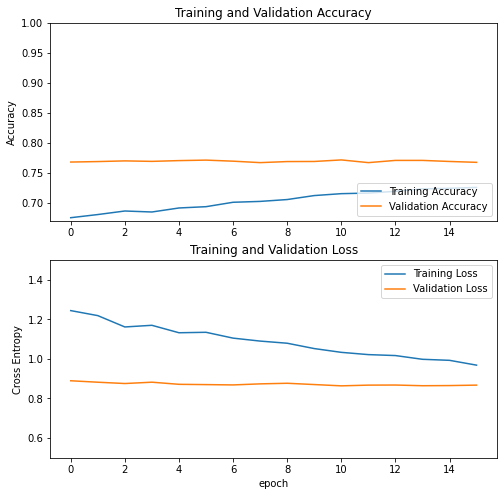

In [ ]:
import matplotlib.pyplot as plt

acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0.5,1.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Finetuning

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 528, 528, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 528, 528, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 528, 528, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 529, 529, 3)  0           normalization[0][0]              
_______________________________________________________________________________________

In [ ]:
model.trainable = True

set_trainable = False
for layer in model.layers:
    if layer.name == 'block7b_project_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
for layer in model.layers:
    print(layer.name,layer.trainable)

input_1 False
rescaling False
normalization False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block1b_dwconv False
block1b_bn False
block1b_activation False
block1b_se_squeeze False
block1b_se_reshape False
block1b_se_reduce False
block1b_se_expand False
block1b_se_excite False
block1b_project_conv False
block1b_project_bn False
block1b_drop False
block1b_add False
block1c_dwconv False
block1c_bn False
block1c_activation False
block1c_se_squeeze False
block1c_se_reshape False
block1c_se_reduce False
block1c_se_expand False
block1c_se_excite False
block1c_project_conv False
block1c_project_bn False
block1c_drop False
block1c_add False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwc

In [ ]:
train_val = tf.data.Dataset.from_tensor_slices((tf.cast(val_set['filename'].values, tf.string),
                                                    tf.cast(val_set['class'].values, tf.int32) ))
train_val = train_val.map(image_augmentation)
train_val = train_val.apply(tf.data.experimental.ignore_errors())
train_val = train_val.shuffle(1500)
train_val = train_val.repeat()
train_val = train_val.batch(batch_size, drop_remainder=True)

(528, 528, 3)


In [ ]:
# print(len(train_set_4))
print(len(val_set))

6208


In [ ]:
train_steps = int(6208/batch_size) #total trains set / batch_size
val_steps = int(6208/batch_size)
epochs = 1


print('train steps:',train_steps)
print('val steps:',val_steps)

train steps: 194
val steps: 194


In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.0002)

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history_ft = model.fit( train_dataset, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 1/5
437/437 [==============================] - ETA: 0s - loss: 0.8935 - accuracy: 0.7559 
Epoch 00001: val_loss improved from inf to 0.82798, saving model to ./checkpoints_kee/prod_detection_best_weights_ftftft.hdf5
437/437 [==============================] - 6883s 16s/step - loss: 0.8935 - accuracy: 0.7559 - val_loss: 0.8280 - val_accuracy: 0.7845
Epoch 2/5
437/437 [==============================] - ETA: 0s - loss: 0.8572 - accuracy: 0.7623
Epoch 00002: val_loss did not improve from 0.82798
437/437 [==============================] - 1665s 4s/step - loss: 0.8572 - accuracy: 0.7623 - val_loss: 0.8361 - val_accuracy: 0.7824
Epoch 3/5
437/437 [==============================] - ETA: 0s - loss: 0.8276 - accuracy: 0.7673
Epoch 00003: val_loss did not improve from 0.82798
437/437 [==============================] - 1665s 4s/step - loss: 0.8276 - accuracy: 0.7673 - val_loss: 0.8439 - val_accuracy: 0.7848
Epoch 4/5
101/437 [=====>........................] - ETA: 15:13 - loss: 0.7891 - accur

KeyboardInterrupt: ignored

In [ ]:
history_ft = model.fit( train_dataset_2, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 1/5
437/437 [==============================] - ETA: 0s - loss: 0.9396 - accuracy: 0.7421 
Epoch 00001: val_loss improved from 0.82798 to 0.82011, saving model to ./checkpoints_kee/prod_detection_best_weights_ftftft.hdf5
437/437 [==============================] - 7047s 16s/step - loss: 0.9396 - accuracy: 0.7421 - val_loss: 0.8201 - val_accuracy: 0.7833
Epoch 2/5
278/437 [==================>...........] - ETA: 7:11 - loss: 0.9206 - accuracy: 0.7469

In [ ]:
history_ft = model.fit( train_dataset_2, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   initial_epoch = 1,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 2/30
437/437 [==============================] - ETA: 0s - loss: 0.9631 - accuracy: 0.7373 
Epoch 00002: val_loss improved from inf to 0.82607, saving model to ./checkpoints_kee/prod_detection_best_weights_ftft.hdf5
437/437 [==============================] - 12018s 28s/step - loss: 0.9631 - accuracy: 0.7373 - val_loss: 0.8261 - val_accuracy: 0.7812
Epoch 3/30
437/437 [==============================] - ETA: 0s - loss: 0.9181 - accuracy: 0.7451
Epoch 00003: val_loss improved from 0.82607 to 0.82490, saving model to ./checkpoints_kee/prod_detection_best_weights_ftft.hdf5
437/437 [==============================] - 2407s 6s/step - loss: 0.9181 - accuracy: 0.7451 - val_loss: 0.8249 - val_accuracy: 0.7830
Epoch 4/30
437/437 [==============================] - ETA: 0s - loss: 0.9113 - accuracy: 0.7481
Epoch 00004: val_loss did not improve from 0.82490
437/437 [==============================] - 2400s 5s/step - loss: 0.9113 - accuracy: 0.7481 - val_loss: 0.8313 - val_accuracy: 0.7822
Epoch 5

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-397b668f51a2>", line 7, in <module>
    callbacks = callbacks)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 108, in _method_wrapper
    return method(self, *args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py", line 1104, in fit
    callbacks.on_train_batch_end(end_step, logs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/callbacks.py", line 440, in on_train_batch_end
    self._call_batch_hook(ModeKeys.TRAIN, 'end', batch, logs=logs)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/callbacks.py", line 289, in _call_batch_hook
    self._call_batch_end_hook(mode, batch, logs)
  File "/usr/local/lib/python3.6/dist-packages

KeyboardInterrupt: ignored

In [ ]:
history_ft = model.fit( train_dataset_3, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 1/5
437/437 [==============================] - ETA: 0s - loss: 0.9431 - accuracy: 0.7371 
Epoch 00001: val_loss improved from inf to 0.81956, saving model to ./checkpoints_kee/prod_detection_best_weights_ftftft.hdf5
437/437 [==============================] - 6515s 15s/step - loss: 0.9431 - accuracy: 0.7371 - val_loss: 0.8196 - val_accuracy: 0.7833
Epoch 2/5
437/437 [==============================] - ETA: 0s - loss: 0.9402 - accuracy: 0.7417
Epoch 00002: val_loss improved from 0.81956 to 0.81750, saving model to ./checkpoints_kee/prod_detection_best_weights_ftftft.hdf5
437/437 [==============================] - 2359s 5s/step - loss: 0.9402 - accuracy: 0.7417 - val_loss: 0.8175 - val_accuracy: 0.7877
Epoch 3/5
437/437 [==============================] - ETA: 0s - loss: 0.8811 - accuracy: 0.7544
Epoch 00003: val_loss did not improve from 0.81750
437/437 [==============================] - 2368s 5s/step - loss: 0.8811 - accuracy: 0.7544 - val_loss: 0.8318 - val_accuracy: 0.7846
Epoch 4

KeyboardInterrupt: ignored

In [ ]:
history_ft = model.fit( train_dataset_3, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   initial_epoch = 3,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 4/30
235/437 [===============>..............] - ETA: 56:19 - loss: 0.9861 - accuracy: 0.7299

In [ ]:
history_ft = model.fit( train_dataset_4, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

Epoch 1/5
433/433 [==============================] - ETA: 0s - loss: 0.9474 - accuracy: 0.7421WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.8705s vs `on_test_batch_end` time: 2.5462s). Check your callbacks.

Epoch 00001: val_loss improved from 0.81750 to 0.81347, saving model to ./checkpoints_kee/prod_detection_best_weights_ftftft.hdf5
433/433 [==============================] - 4928s 11s/step - loss: 0.9474 - accuracy: 0.7421 - val_loss: 0.8135 - val_accuracy: 0.7872
Epoch 2/5
433/433 [==============================] - ETA: 0s - loss: 0.9165 - accuracy: 0.7485
Epoch 00002: val_loss did not improve from 0.81347
433/433 [==============================] - 2333s 5s/step - loss: 0.9165 - accuracy: 0.7485 - val_loss: 0.8195 - val_accuracy: 0.7851
Epoch 3/5
433/433 [==============================] - ETA: 0s - loss: 0.8954 - accuracy: 0.7551
Epoch 00003: val_loss did not improve from 0.81347
433/433 [==============================] - 

In [ ]:
history_ft.history

{'accuracy': [0.742061197757721,
  0.7484844326972961,
  0.7551241517066956,
  0.7554128170013428,
  0.7691252827644348],
 'loss': [0.9473570585250854,
  0.9164928197860718,
  0.8953602910041809,
  0.880707323551178,
  0.8239348530769348],
 'lr': [1e-04, 1e-04, 1e-04, 9e-05, 9e-05],
 'val_accuracy': [0.7872100472450256,
  0.7851159572601318,
  0.7855992317199707,
  0.7862435579299927,
  0.7872100472450256],
 'val_loss': [0.8134686946868896,
  0.8194845914840698,
  0.8172597289085388,
  0.8168154954910278,
  0.8208195567131042]}

In [ ]:
history_ft = model.fit( train_val, 
                    steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                    callbacks = callbacks)

194/194 [==============================] - ETA: 0s - loss: 1.2020 - accuracy: 0.6870 WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.8468s vs `on_test_batch_end` time: 2.6181s). Check your callbacks.

Epoch 00001: val_loss improved from inf to 0.74205, saving model to ./checkpoints_kee/prod_detection_best_weights_ftftft.hdf5
194/194 [==============================] - 3362s 17s/step - loss: 1.2020 - accuracy: 0.6870 - val_loss: 0.7420 - val_accuracy: 0.7975


# Making Predictions

In [ ]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np
import os

img_path = 'test/'+image_name
img = image.load_img(img_path, target_size=(528, 528))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

softmax_result = model.predict(x)
print(softmax_result.shape)


class_index = np.argmax(lst)
print("Predicted category: ", class_index)

In [ ]:
softmax_result

array([[2.04826050e-04, 5.44986578e-05, 2.92797253e-04, 2.42761191e-04,
        8.72434795e-01, 1.09162384e-05, 7.56251737e-08, 3.47452078e-05,
        9.49000949e-08, 1.67490343e-05, 6.08355094e-07, 4.61063019e-06,
        6.44042416e-07, 1.51484155e-05, 4.74877140e-07, 2.67841733e-06,
        1.41343589e-05, 6.54505720e-06, 3.76592243e-06, 9.71513714e-07,
        8.83422217e-06, 5.73125471e-05, 2.41897433e-05, 1.87893256e-05,
        2.75400475e-06, 7.36498041e-05, 2.15701277e-07, 1.63331924e-06,
        1.21839466e-02, 1.14213452e-01, 9.91458273e-06, 4.82575115e-06,
        5.84137888e-05, 6.14735711e-08, 1.76149328e-07, 1.68897205e-11,
        1.82646064e-12, 8.71348913e-12, 2.02935346e-12, 1.25459417e-11,
        1.34714401e-11, 2.78647548e-12]], dtype=float32)

# Churn .csv file for predicted test set

In [ ]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np

Using TensorFlow backend.


In [ ]:
# To load saved weights
model.load_weights('./checkpoints_kee/prod_detection_best_weights_ft.hdf5')

In [ ]:
test_df = pd.read_csv("test.csv")
print(len(test_df))
test_df.head()

12186


,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,43
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,43
2,127f3e6d6e3491b2459812353f33a913.jpg,43
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,43
4,46d681a542f2c71be017eef6aae23313.jpg,43


In [ ]:
print(len(test_df))

12186


In [ ]:
cd test

/gdrive/My Drive/SCL_product_detection/shopee-product-detection-dataset/test


In [ ]:
# This the shit that will take ages

for i in range(0, len(test_df)):
  img = image.load_img(test_df['filename'].iloc[i], target_size=(528, 528))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  p = model.predict(x)
  class_index = np.argmax(p)
  test_df['category'].iloc[i] = class_index

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
test_df.head(50) # We can see that the single-digit numbers have not been padded with zeros yet

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,20
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,27
2,127f3e6d6e3491b2459812353f33a913.jpg,4
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,22
4,46d681a542f2c71be017eef6aae23313.jpg,12
5,f27ffaf1ab259a0efe2c59611de6732b.jpg,40
6,5eb8d9688d86ec7277f10fc18f386913.jpg,4
7,2ff578b587ec0c086ded573a3a9a9e3a.jpg,39
8,936b60783f4f3d3f2b718cc28a1cd629.jpg,33
9,2ac0233cc59040fd847f0cd9528772cc.jpg,34


In [ ]:
def zero_padding(x):
  if x >= 10:
    return x
  else:
    str_pad = "".join(['0', str(x)])
    return str_pad

In [ ]:
zero_padding(0)

'00'

In [ ]:
test_df['category'] = test_df['category'].map(lambda x: zero_padding(x))
test_df.head(50)

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,20
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,27
2,127f3e6d6e3491b2459812353f33a913.jpg,04
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,22
4,46d681a542f2c71be017eef6aae23313.jpg,12
5,f27ffaf1ab259a0efe2c59611de6732b.jpg,40
6,5eb8d9688d86ec7277f10fc18f386913.jpg,04
7,2ff578b587ec0c086ded573a3a9a9e3a.jpg,39
8,936b60783f4f3d3f2b718cc28a1cd629.jpg,33
9,2ac0233cc59040fd847f0cd9528772cc.jpg,34


In [ ]:
test_df.groupby('category').agg('count')

,filename
category,
10,351
11,302
12,255
13,291
14,235
15,287
16,413
17,207
18,356


In [ ]:
# Output results to .csv file
test_df.to_csv('../submission.csv', index = False)